In [12]:
# import pandas as pd
# import pickle
# import numpy as np
# import sys

# import statsmodels.tsa.api as smt     
# import statsmodels.api as sm
# import scipy.stats as scs
# from arch import arch_model
# from statsmodels.tsa import stattools
# from statsmodels.stats.diagnostic import acorr_ljungbox
# from statsmodels.tsa.stattools import adfuller 
# from statsmodels.tsa.stattools import acf 
# from statsmodels.graphics.tsaplots import plot_acf

# import matplotlib.pyplot as plt
# %matplotlib inline
# #正常显示画图时出现的中文和负号
# from pylab import mpl
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa import stattools
# from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [50]:
# def draw_acf_pacf(data):
#     """
#     输入需要求解ACF\PACF的数据,
#     data["xt"]
#     """
#     plt.rcParams['font.sans-serif'] = ['SimHei']
    
#     #模型的平稳性检验
#     """时序图"""
#     # plt.rcParams['font.sans-serif']=['SimHei']
#     # plt.plot(figsize=(12,8))
#     # plt.legend(bbox_to_anchor=(1.25, 0.5))
#     # plt.title("时序图")
#     fig = plt.figure(figsize=(12,10))     
#     """单位根检验"""
#     print("单位根检验:\n")
#     print(adfuller(data))    
        
#     """ACF"""
#     ax1 = fig.add_subplot(211)
#     fig = sm.graphics.tsa.plot_acf(data, lags=30,ax=ax1)
#     ax1.xaxis.set_ticks_position('bottom')
#     fig.tight_layout();
#     """PACF"""
#     ax2 = fig.add_subplot(212)
#     fig = sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax2)
#     ax2.xaxis.set_ticks_position('bottom')
#     fig.tight_layout();
# # draw_acf_pacf(data["xt"])   


In [2]:
data=pd.read_csv(r"data.csv")
con=data['con_settlement'].values.tolist()
act=data['act_settlement'].values.tolist()

In [3]:
r_con=[]
for i in range(1,len(con)):
    r_con.append((con[i]-con[i-1])*100/con[i-1])
len(r_con)

932

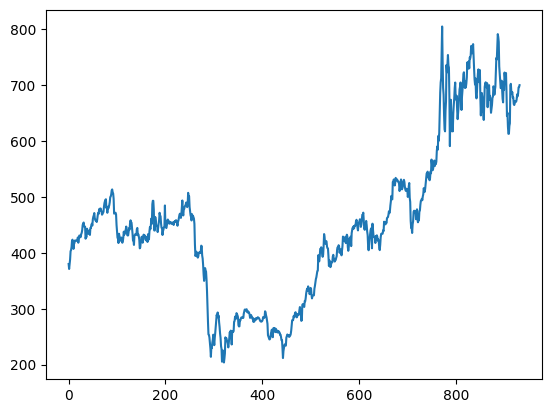

In [4]:
plt.plot(con,label="con")
# plt.plot(r_con,label="r_con")
plt.show()

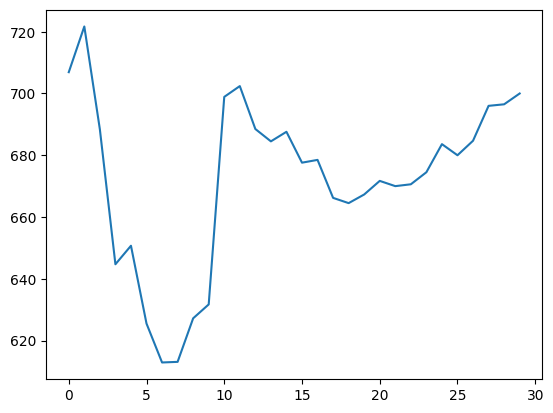

In [5]:
plt.plot(con[-30:])
# plt.plot(r_con)
plt.show()

#### 转换成收益率

In [6]:
r_con=[]
for i in range(1,len(con)):
    r_con.append((con[i]-con[i-1])*100/con[i-1])
len(r_con)

932

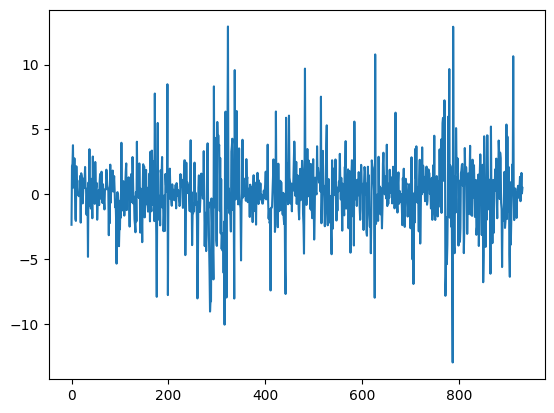

In [7]:
plt.plot(r_con)
plt.show()

In [13]:
LjungBox = stattools.q_stat(stattools.acf(r_con),len(r_con))
LjungBox[1][-1]

2.2130010373415463e-187

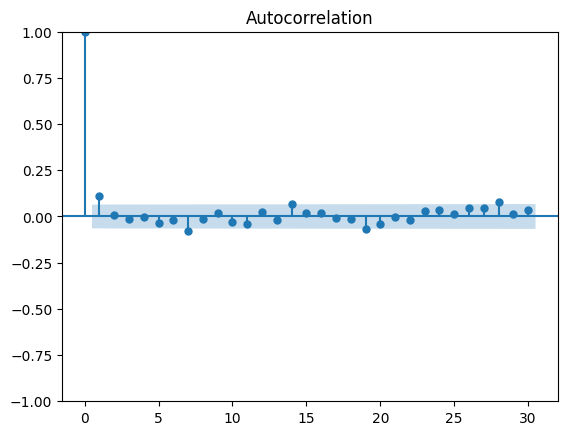

In [28]:
plot_acf(r_con, lags=30)
plt.show()

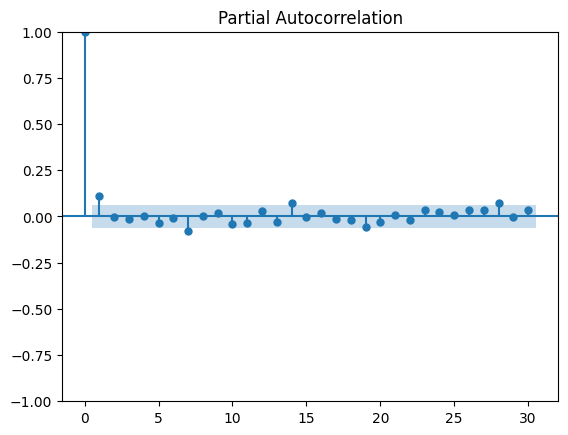

In [11]:
plot_pacf(r_con, lags=30)
plt.show()

In [14]:
model=arch_model(r_con[:-30],p=1,q=1)
model_fit=model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3951.3467093144836
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2074.5735244923135
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2121.632431758183
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2041.7675454584999
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2031.9405870179062
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2031.929182537352
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2031.931446072204
Iteration:      8,   Func. Count:     50,   Neg. LLF: 2031.9285033951596
Iteration:      9,   Func. Count:     55,   Neg. LLF: 2031.928481771506
Iteration:     10,   Func. Count:     59,   Neg. LLF: 2031.9284817715989
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2031.928481771506
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10


In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2031.93
Distribution:                  Normal   AIC:                           4071.86
Method:            Maximum Likelihood   BIC:                           4091.08
                                        No. Observations:                  902
Date:                Tue, Dec 06 2022   Df Residuals:                      901
Time:                        16:00:57   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1824  6.895e-02      2.645  8.166e-03 [4.724e-02,  0.318]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5395      0.244      2.213  2.692e-02 [6.161e-02,  1.017]
alpha[1]       0.2019  5.716e-02      3.533  4.113e-04 [8.990e-02,  0.314]
beta[1]        0.7248  7.847e-02      9.236  2.547e-20   [  0.571,  0.879]
==========================================================================

Covariance estimator: robust
"""

In [48]:
rolling_pre=[]
frolling_pre=[]
mrolling_pre=[]
test_size=30
for i in range(test_size):
    train=r_con[:-test_size+i]
    model=arch_model(train,p=1,q=1)
    model_fit=model.fit(disp='off')
    pred=model_fit.forecast(horizon=1)
    # print(pred.variance[-1:].iloc[0][0])
    rolling_pre.append(np.sqrt(pred.variance[-1:].iloc[0][0]))
    frolling_pre.append(-np.sqrt(pred.variance[-1:].iloc[0][0]))
    mrolling_pre.append(pred.mean[-1:].iloc[0][0])
# rolling_pre

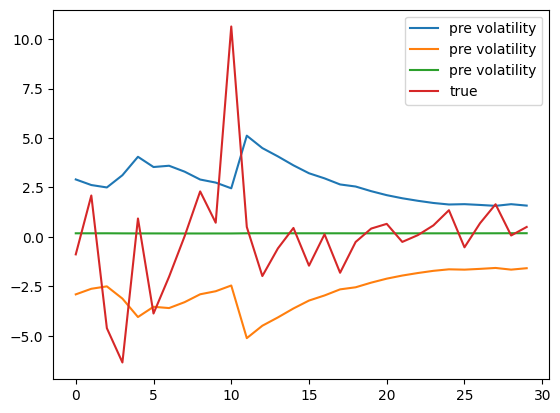

In [49]:
plt.plot(rolling_pre,label='pre volatility')
plt.plot(frolling_pre,label='pre volatility')
plt.plot(mrolling_pre,label='pre volatility')
plt.plot(r_con[-test_size:],label='true')
plt.legend()
plt.show()

In [57]:
garch_pre=[]
for i in range(len(mrolling_pre)):
    garch_pre.append(con[-test_size+i-1]*(mrolling_pre[i]+100)/100)
garch_pre

[714.5008018555284,
 708.1860091223429,
 723.0223821104505,
 689.6307816259385,
 645.8410662544355,
 651.8490443942205,
 626.5960303499436,
 613.966725033477,
 614.1625579696588,
 628.2927086443879,
 632.8017243695015,
 700.1781120628973,
 703.6862419707219,
 689.7587383252228,
 685.7511613821273,
 688.8588015137514,
 678.8368450674637,
 679.7391371564653,
 667.4082738560409,
 665.7022584943761,
 668.5076562942913,
 672.9184750574417,
 671.2122022077149,
 671.8119845208187,
 675.7227231753945,
 684.8530506373172,
 681.2407146767945,
 685.9557639303976,
 697.2954374247923,
 697.7992468313103]

In [51]:
import pickle
fr=open("./results/predict1129.txt","rb")
predict=pickle.load(fr)
fr.close()
con_p=predict[0]
act_p=predict[1]

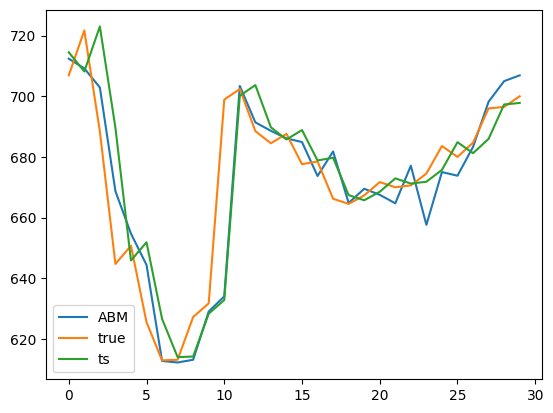

In [59]:
plt.plot(con_p[-30:],label='ABM')
plt.plot(con[-30:],label='true')
plt.plot(garch_pre,label='ts')
plt.legend()
plt.show()

In [60]:
import pickle
file=open("garch_pre30.txt","wb")
pickle.dump(garch_pre,file)
file.close()

In [61]:
# Mean Absolute Error, MAE
mea=0
for i in range(30):
    mea+=abs(garch_pre[i]-con[-30+i])
mea/30

10.72597602859189

In [64]:
# mean absolute percentage error, MAPE
mape=0
for i in range(30):
    mape+=abs(con[-30+i]-garch_pre[i])*100/con[-30+i]
mape/30

1.5993515106486973

In [63]:
# symmetric mean absolute percentage error, SMAPE
smape=0
for i in range(30):
    smape+=abs(garch_pre[i]-con[-30+i])/((garch_pre[i]+con[-30+i])/2)
smape/30

0.015991530233830518

In [66]:
# Mean Squared Error, MSE
mse=0
for i in range(30):
    mse+=(garch_pre[i]-con[-30+i])**2
mse/30

324.4243723092634

In [67]:
# root mean squared error, RMSE
(mse/30)**0.5

18.011784262234084

In [68]:
# Mean Squared log error, MSLE
msle=0
for i in range(30):
    msle+=(np.log(1+con[-30+i])-np.log(1+garch_pre[i]))**2
msle/30

0.0007229433788011313

单位根检验:

(-27.21208922467487, 0.0, 0, 931, {'1%': -3.437393417528114, '5%': -2.864649445749773, '10%': -2.5684256575572735}, 4308.335626270364)


f:\python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


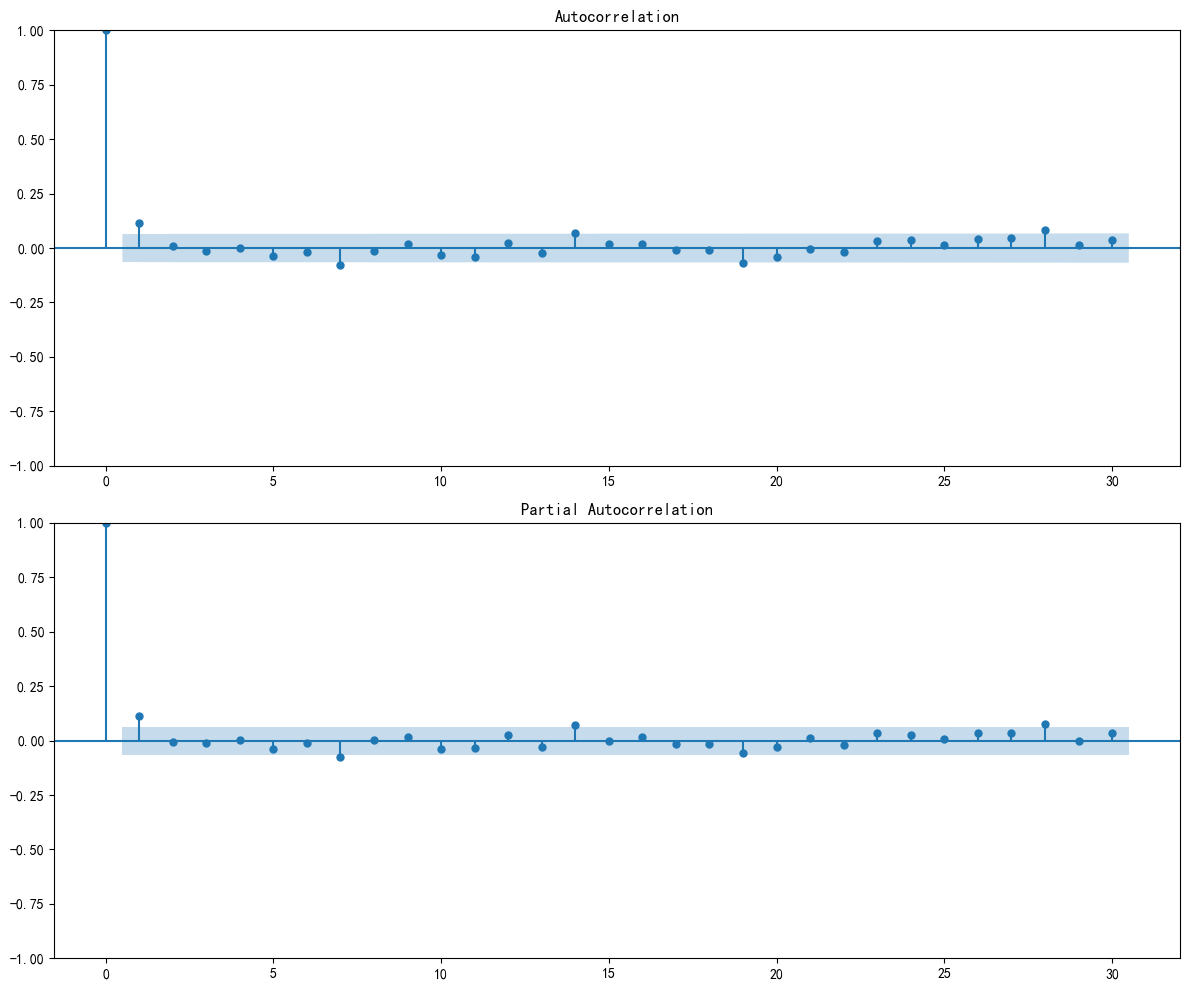

In [53]:
# draw_acf_pacf(r_con)

In [90]:
# am=arch_model(r_con,vol='Garch',p=7,o=0,q=1,dist='StudentsT')
# model=am.fit(update_freq=1)
# # model=am.fit()
# print(model.summary())

Iteration:      1,   Func. Count:     13,   Neg. LLF: 4001.0411321082047
Iteration:      2,   Func. Count:     27,   Neg. LLF: 3119.411209895562
Iteration:      3,   Func. Count:     40,   Neg. LLF: 2897.185539660666
Iteration:      4,   Func. Count:     53,   Neg. LLF: 2815.530792908973
Iteration:      5,   Func. Count:     66,   Neg. LLF: 3130.696580903365
Iteration:      6,   Func. Count:     79,   Neg. LLF: 2901.8605360769625
Iteration:      7,   Func. Count:     92,   Neg. LLF: 2897.5191818058574
Iteration:      8,   Func. Count:    105,   Neg. LLF: 2951.78067359213
Iteration:      9,   Func. Count:    118,   Neg. LLF: 2084.377079410031
Iteration:     10,   Func. Count:    131,   Neg. LLF: 2062.682481791935
Iteration:     11,   Func. Count:    144,   Neg. LLF: 2152.845126518974
Iteration:     12,   Func. Count:    157,   Neg. LLF: 2066.5488046507458
Iteration:     13,   Func. Count:    170,   Neg. LLF: 2068.3201757805573
Iteration:     14,   Func. Count:    183,   Neg. LLF: 2058.8

In [111]:
forecasts={}
# am=arch_model(r_con,vol='Garch',p=7,o=0,q=14,dist='normal')
am=arch_model(r_con,mean='AR',lags=0,vol='harch',p=[1,7,14])
for i in range(30):
    sys.stdout.write('.')
    sys.stdout.flush()
    res = am.fit(last_obs=i+len(r_con)-30, disp='off')
    temp = res.forecast(horizon=1).mean
    fcast = temp.iloc[i+len(r_con)-30-1]
    forecasts[fcast.name] = fcast
print()


.........

f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the i

.....

f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the i

.....

f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the i

.....

f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the i

.....

f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the i

.


f:\python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [113]:
print(pd.DataFrame(forecasts).T)
rp=pd.DataFrame(forecasts).T.values.tolist()
print(rp)

          h.1
901  0.184023
902  0.183461
903  0.184950
904  0.179701
905  0.177960
906  0.177344
907  0.174878
908  0.173555
909  0.173108
910  0.174245
911  0.174550
912  0.181265
913  0.180964
914  0.180691
915  0.180920
916  0.181749
917  0.181728
918  0.182221
919  0.181854
920  0.179920
921  0.178869
922  0.178452
923  0.176829
924  0.175308
925  0.174671
926  0.176035
927  0.174870
928  0.175659
929  0.178653
930  0.178946
[[0.1840228259615279], [0.18346089682271005], [0.18495037940324072], [0.17970146636086315], [0.1779597106097563], [0.17734354490497703], [0.17487833056155677], [0.17355469180973718], [0.1731076827321735], [0.1742454276252947], [0.1745498684088331], [0.18126516070459325], [0.1809641844491786], [0.18069075177026397], [0.18092003356060996], [0.1817488110285812], [0.181727569318123], [0.18222097693606154], [0.18185393250924636], [0.17991957097301792], [0.17886871596598317], [0.17845180282437276], [0.1768289640450377], [0.1753083265141809], [0.17467110663543503], [

In [118]:
garch_pre=[]
for i in range(len(rp)):
    garch_pre.append(con[len(data)-61+i]*(rp[i][0]+1))
garch_pre

[793.7689025246083,
 769.9596594728552,
 779.5788546093921,
 784.0295945434297,
 798.06770393811,
 799.7694700539508,
 820.0650747319667,
 816.4419990920343,
 801.1152365378014,
 811.5210150318412,
 818.6612582809566,
 857.4803801554642,
 884.069788478655,
 880.6772317454399,
 909.1903338383137,
 935.1178341669163,
 928.9560422409766,
 918.822143274707,
 867.126230282034,
 850.6040187144486,
 832.3992003435808,
 818.6704674220917,
 818.9552760789418,
 832.11829517204,
 810.1706622464595,
 794.1767332415072,
 786.2230324424113,
 829.0748735627301,
 815.3923137988393,
 851.9064144719008]

In [123]:
import pickle
file=open("garch_pre30.txt","wb")
pickle.dump(garch_pre,file)
file.close()

In [5]:
fr=open("./results/predict1129.txt","rb")
predict=pickle.load(fr)
fr.close()
con_p=predict[0]
act_p=predict[1]

In [120]:
con_p[-30:]

[712.4,
 709.2,
 702.9,
 668.7,
 654.7,
 644.4,
 612.7,
 612.2,
 613.1,
 629.0,
 634.0,
 703.4,
 691.4,
 688.6,
 686.1,
 684.9,
 673.7,
 681.8,
 664.8,
 669.5,
 667.5,
 664.7,
 677.1,
 657.6,
 675.0,
 673.8,
 683.3,
 698.2,
 705.0,
 706.9]

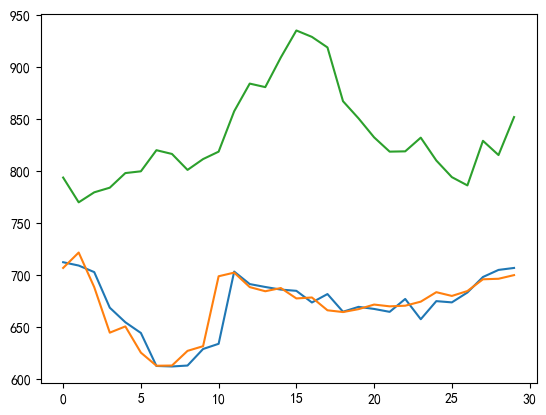

In [122]:
plt.plot(con_p[-30:])
plt.plot(con[-30:])
plt.plot(garch_pre)
plt.show()